In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [73]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [55]:
df.columns.tolist()

['HeartDiseaseorAttack',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'Diabetes',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [61]:
def two_way_Combin(var1,var2):
    combin_names = var1 + "+" + var2 
    df_copy = df.copy()
    df_copy[combin_names] = df_copy[var1].astype(str) + "," +  df_copy[var2].astype(str)
    # Move last column to the first
    #temp_cols=df.columns.tolist()
    #new_cols=temp_cols[-1:] + temp_cols[:-1]
    #df1 = df[new_cols]
    
    df1 = df.copy()
    # rename the elements as number in new column we create
    df_copy[combin_names] = df_copy[combin_names].astype('category')
    df_copy["new_"+combin_names] = df_copy[combin_names].cat.codes
    df_copy = df_copy.drop(columns=[var1, var2])
    
    return df_copy

In [13]:
features_list = ['HighBP','Age','GenHlth','HighChol','DiffWalk','PhysHlth']
features_list

['HighBP', 'Age', 'GenHlth', 'HighChol', 'DiffWalk', 'PhysHlth']

In [69]:
def odd_plot(var,dataframe):
    df_odd = dataframe.copy()
    table_HD_GenHlth = pd.crosstab(df_odd['HeartDiseaseorAttack'],df_odd[var],margins = False)
    odds = table_HD_GenHlth.loc[1]/table_HD_GenHlth.loc[0]
    index_list = odds.index.tolist()
    plt.figure(figsize=(15,3))
    plt.scatter(index_list,odds)
    plt.title(var)
    plt.xlabel('levels')
    plt.xticks(index_list)
    plt.ylabel('odds value')
    plt.show()
    

In [63]:
df_HighBP_Age = two_way_Combin('HighBP','Age')
df_HighBP_Age

,HeartDiseaseorAttack,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Education,Income,HighBP+Age,new_HighBP+Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,4.0,3.0,"1.0,9.0",25
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,6.0,1.0,"0.0,7.0",10
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,4.0,8.0,"1.0,9.0",25
3,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,3.0,6.0,"1.0,11.0",15
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,5.0,4.0,"1.0,11.0",15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,6.0,7.0,"1.0,5.0",21
253676,0.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,2.0,4.0,"1.0,11.0",15
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,"0.0,2.0",5
253678,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,5.0,1.0,"1.0,7.0",23


In [44]:
two_way_Combin('HighBP','Age')['HighBP+Age'].value_counts()

1.0,10.0    18252
0.0,8.0     17583
0.0,7.0     16855
0.0,9.0     16726
1.0,9.0     16518
1.0,11.0    14577
0.0,6.0     14084
0.0,10.0    13942
1.0,8.0     13249
0.0,5.0     12416
1.0,13.0    11288
0.0,4.0     11254
1.0,12.0    10432
0.0,3.0      9487
1.0,7.0      9459
0.0,11.0     8956
0.0,2.0      6717
0.0,13.0     6075
1.0,6.0      5735
0.0,12.0     5548
0.0,1.0      5208
1.0,5.0      3741
1.0,4.0      2569
1.0,3.0      1636
1.0,2.0       881
1.0,1.0       492
Name: HighBP+Age, dtype: int64

In [45]:
two_way_Combin('HighBP','Age')['new_HighBP+Age'].value_counts()

14    18252
11    17583
10    16855
12    16726
25    16518
15    14577
9     14084
1     13942
24    13249
8     12416
17    11288
7     11254
16    10432
6      9487
23     9459
2      8956
5      6717
4      6075
22     5735
3      5548
0      5208
21     3741
20     2569
19     1636
18      881
13      492
Name: new_HighBP+Age, dtype: int64

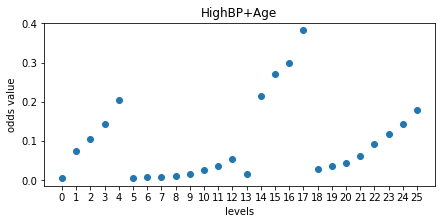

In [32]:
odd_plot('HighBP+Age')

In [74]:
df_GenHlth_Age = two_way_Combin('GenHlth','Age')

In [88]:
df_GenHlth_Age[df_GenHlth_Age["new_GenHlth+Age"]== 52]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,Sex,Education,Income,GenHlth+Age,new_GenHlth+Age
10832,1.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,5.0,1.0,0.0,5.0,6.0,"5.0,1.0",52
16555,0.0,1.0,0.0,1.0,39.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,30.0,12.0,1.0,0.0,2.0,8.0,"5.0,1.0",52
18985,0.0,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,"5.0,1.0",52
19577,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,15.0,30.0,1.0,1.0,5.0,1.0,"5.0,1.0",52
19821,0.0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,30.0,30.0,0.0,1.0,6.0,6.0,"5.0,1.0",52
20067,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,2.0,0.0,0.0,1.0,4.0,1.0,"5.0,1.0",52
26497,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,15.0,20.0,0.0,1.0,5.0,5.0,"5.0,1.0",52
28663,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,15.0,30.0,0.0,1.0,5.0,8.0,"5.0,1.0",52
33065,0.0,1.0,1.0,1.0,44.0,1.0,0.0,2.0,1.0,0.0,...,1.0,1.0,30.0,30.0,0.0,0.0,5.0,1.0,"5.0,1.0",52
33591,0.0,0.0,0.0,1.0,36.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,7.0,0.0,0.0,1.0,4.0,3.0,"5.0,1.0",52


In [86]:
pd.crosstab(df_GenHlth_Age['HeartDiseaseorAttack'],df_GenHlth_Age["new_GenHlth+Age"],margins = False)[52]

HeartDiseaseorAttack
0.0    49
1.0     2
Name: 52, dtype: int64

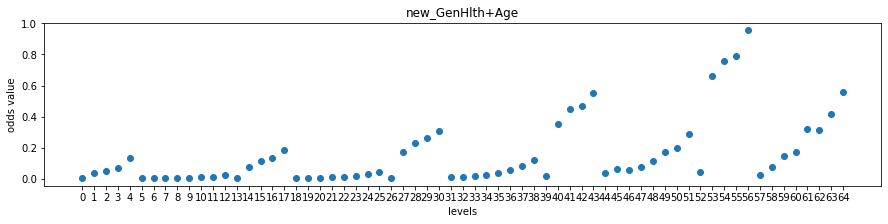

In [70]:
odd_plot('new_GenHlth+Age',df_GenHlth_Age)

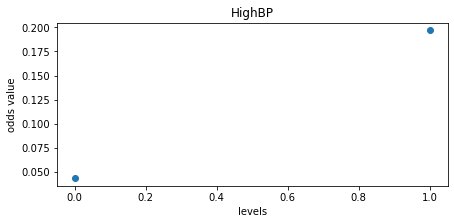

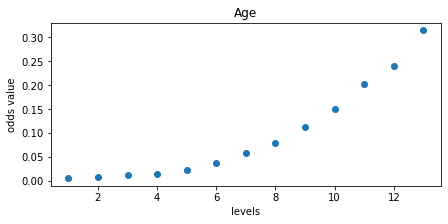

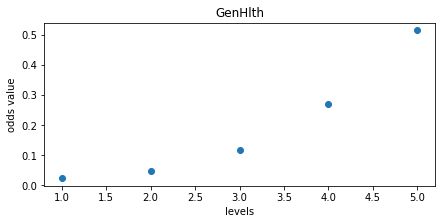

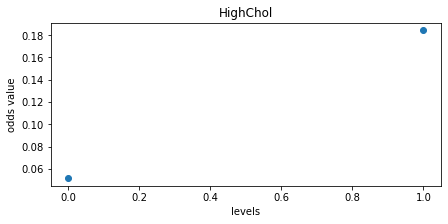

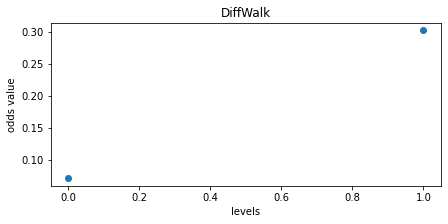

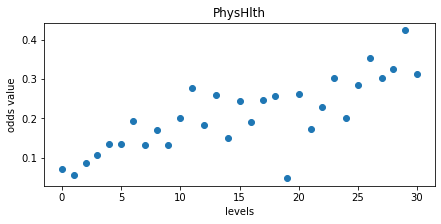

In [18]:
for col in features_list:
    odd_plot(col)

In [92]:
table_HD_GenHlth = pd.crosstab(df['HeartDiseaseorAttack'],df['GenHlth'],margins = False)
table_HD_GenHlth 

GenHlth,1.0,2.0,3.0,4.0,5.0
HeartDiseaseorAttack,,,,,
0.0,44283,84956,67732,24842,7974
1.0,1016,4128,7914,6728,4107


In [93]:
odds = table_HD_GenHlth.loc[1]/table_HD_GenHlth.loc[0]
index_list = odds.index.tolist()
index_list

[1.0, 2.0, 3.0, 4.0, 5.0]

Odds:is calculated by dividing the number of people with heart disease attack by the number of people without heart disease attack for each level of general health.

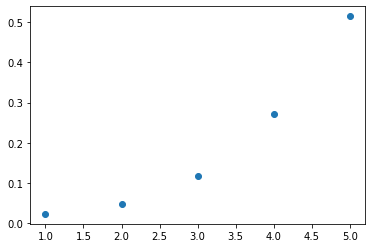

In [94]:
plt.scatter(index_list,odds)
plt.show()

In [ ]:
def 

In [67]:
import pandas as pd

# Create a DataFrame with two rows and three columns
data = {'A': [10, 20, 30], 'B': [5, 10, 15], 'C': [2, 4, 6]}
df = pd.DataFrame(data, index=['row1', 'row2', 'row3'])

# Calculate the ratio of row1 to row2
ratio = df.loc['row1'] / df.loc['row2']

# Print the resulting ratio
print(ratio)


A    0.5
B    0.5
C    0.5
dtype: float64


In [68]:
df.loc['row1']

A    10
B     5
C     2
Name: row1, dtype: int64

In [61]:
df

,A,B,C
row1,10,5,2
row2,20,10,4
row3,30,15,6


In [59]:
table_HD_GenHlth[1][1]

1016

In [58]:
table_HD_GenHlth.columns.tolist()
table_HD_GenHlth.index.tolist()

[0.0, 1.0]

In [55]:
for col in table_HD_GenHlth.columns.tolist():
    for row in table_HD_GenHlth.index.tolist():
        table_HD_GenHlth[col][col]/table_HD_GenHlth[col][0]
        

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64', name='GenHlth')

In [52]:
table_HD_GenHlth.columns
table_HD_GenHlth[1][1]/table_HD_GenHlth[1][0]

0.022943341688684143

In [50]:
table_HD_GenHlth[1][1]

1016

In [ ]:
odds = contingency_table[True] / contingency_table[False]

In [33]:
import pandas as pd
from scipy.stats.contingency import odds_ratio

ImportError: cannot import name 'odds_ratio' from 'scipy.stats.contingency' (/Users/williecheng/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/contingency.py)

In [27]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Create a contingency table using pd.crosstab()
df = pd.DataFrame({'Gender': ['M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M'],
                   'Smoker': ['Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y']})
ct = pd.crosstab(df['Gender'], df['Smoker'])

# Calculate odds ratio for each column
for col in ct.columns:
    odds, pvalue = oddsratio(ct.iloc[:,col])
    print(f"Odds ratio for {col}: {odds}")

NameError: name 'oddsratio' is not defined

In [40]:
import scipy.stats as stats
df = pd.DataFrame({'Gender': ['M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M'],
                   'Smoker': ['Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y']})
df

,Gender,Smoker
0,M,Y
1,F,N
2,M,Y
3,F,N
4,F,Y
5,M,Y
6,M,N
7,F,Y
8,F,N
9,M,Y


In [41]:
table = df.groupby(level=0).sum().values
oddsratio, pvalue = stats.fisher_exact(table)
print("OddsR: ", oddsratio, "p-Value:", pvalue)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/williecheng/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/xk/bzswhdp94nzc63thcm13886w0000gn/T/ipykernel_69012/1568469334.py", line 2, in <cell line: 2>
    oddsratio, pvalue = stats.fisher_exact(table)
  File "/Users/williecheng/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py", line 4231, in fisher_exact
ValueError: invalid literal for int() with base 10: 'M'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/williecheng/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1982, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/williecheng/opt/anaconda3/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.str

In [ ]:
import scipy.stats as stats
df = pd.DataFrame({'Gender': ['M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M'],
                   'Smoker': ['Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y']})
table = df.groupby(level='Gender').sum().values
print(table)


oddsratio, pvalue = stats.fisher_exact(table)
print("OddsR: ", oddsratio, "p-Value:", pvalue)